In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import re
import nltk
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time 
import contractions
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing  import LabelEncoder


### Importing of Kaggle Repository Twitter Dataset

In this Classification Task, we are trying to train a model to classify our crawled dataset whether the tweets are subjective or objective, positive or negative sentiments

In [2]:
tweets = pd.read_csv("textblob_train.csv")

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88045 entries, 0 to 88044
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             88045 non-null  int64  
 1   tweet_id               88045 non-null  float64
 2   ticker_symbol          88045 non-null  object 
 3   writer                 88045 non-null  object 
 4   post_date              88045 non-null  object 
 5   body                   88045 non-null  object 
 6   comment_num            88045 non-null  int64  
 7   retweet_num            88045 non-null  int64  
 8   like_num               88045 non-null  int64  
 9   tweet_activity         88045 non-null  int64  
 10  sentiment_category     88045 non-null  int64  
 11  subjectivity_category  88045 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 8.1+ MB


In [4]:
tweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0


In [5]:
tweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0


### Importing of Crawled Twitter Dataset

This is the crawled dataset from twitter with regards to stocks such as AAPL, AMZN, MSFT, TSLA, GOOGL

In [6]:
crawled_tweets = pd.read_csv('new_label_acc_100.csv')

In [7]:
crawled_tweets.tail()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,word_count,clean_text,subjectivity_1,sentiment_1,subjectivity_2,sentiment_2,moderator_sub,moderator_sen,vote_subjectivity,vote_sentiment
4293,TSLA,2023-02-28 23:25:43+00:00,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,5,71,1,...,10,tsla tsla option interest 800sssss 600sss 300s...,0,0,0,0,NaN,NaN,0.0,0.0
4294,TSLA,2023-02-28 23:23:40+00:00,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,2,96,0,...,10,rivn nearli 10 earn compani make tsla look goo...,1,1,1,1,NaN,NaN,1.0,1.0
4295,TSLA,2023-02-28 23:20:10+00:00,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,11,50,0,...,8,surpris tsla give fli fuck custom theyv taken,1,-1,1,-1,NaN,NaN,1.0,-1.0
4296,TSLA,2023-02-28 23:12:27+00:00,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,7,311,0,...,23,creepi af get notif someon add list includ ad ...,1,1,0,0,0.0,0.0,0.0,0.0
4297,TSLA,2023-02-28 23:06:48+00:00,1.630706e+18,stevenmarkryan,Can't wait to see how pissed the cry babies wh...,289,16,15,320,0,...,31,cant wait see piss cri babi also tsla elonmusk...,1,-1,1,-1,NaN,NaN,1.0,-1.0


In [8]:
crawled_tweets['vote_subjectivity'] = crawled_tweets['vote_subjectivity'].astype(int)
crawled_tweets['vote_sentiment']= crawled_tweets['vote_sentiment'].astype(int)

In [9]:
crawled_tweets

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,word_count,clean_text,subjectivity_1,sentiment_1,subjectivity_2,sentiment_2,moderator_sub,moderator_sen,vote_subjectivity,vote_sentiment
0,AAPL,2023-01-01 22:23:31+00:00,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,...,11,thing go get interest q1 forecast updat aapl r...,0,0,0,0,NaN,NaN,0,0
1,AAPL,2023-01-01 21:04:45+00:00,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,...,21,happi new year spacemob let hope 2023 year blu...,0,1,0,1,NaN,NaN,0,1
2,AAPL,2023-01-01 20:44:51+00:00,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,...,10,aapl appl weekli chart hammer candl spring jun...,0,0,0,0,NaN,NaN,0,0
3,AAPL,2023-01-01 19:45:30+00:00,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,...,4,aapl yearli 268 urlplacehold,0,0,0,0,NaN,NaN,0,0
4,AAPL,2023-01-01 19:00:00+00:00,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,...,23,look short new year emojiplacehold weekli tria...,0,1,0,1,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,TSLA,2023-02-28 23:25:43+00:00,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,5,71,1,...,10,tsla tsla option interest 800sssss 600sss 300s...,0,0,0,0,NaN,NaN,0,0
4294,TSLA,2023-02-28 23:23:40+00:00,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,2,96,0,...,10,rivn nearli 10 earn compani make tsla look goo...,1,1,1,1,NaN,NaN,1,1
4295,TSLA,2023-02-28 23:20:10+00:00,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,11,50,0,...,8,surpris tsla give fli fuck custom theyv taken,1,-1,1,-1,NaN,NaN,1,-1
4296,TSLA,2023-02-28 23:12:27+00:00,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,7,311,0,...,23,creepi af get notif someon add list includ ad ...,1,1,0,0,0.0,0.0,0,0


In [10]:
remaining_data = pd.read_csv('remaining_data.csv')

In [11]:
remaining_data.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text
0,APPL,2023-01-01 21:51:38+00:00,1609668699513839616,BalarezoCapital,$AAPL \n\nAAPL is in a DOWNTREND below all KMA...,9,0,3,12,1,[],{},0,16,aapl aapl downtrend kma high probabl continu l...
1,APPL,2023-01-01 21:31:03+00:00,1609663518265192448,DZierler,@Johnbenny101 I believe winning #VR #MixedReal...,6,1,3,10,0,[],{'✅': 5},5,41,johnbenny101 believ win vr mixedr ar display a...
2,APPL,2023-01-01 21:30:09+00:00,1609663291793747969,SPXTrades,Everyone is looking for $AAPL to fall into 95-...,20,2,1,23,1,[],{},0,33,everyon look aapl fall 95100 zone last bulwark...
3,APPL,2023-01-01 21:00:03+00:00,1609655716767318021,bullsonwallst,Current Berkshire Hathaway portfolio📊\n\nToo m...,11,1,3,15,1,[],{'📊': 1},1,7,current berkshir hathaway portfolioemojiplaceh...
4,APPL,2023-01-01 20:15:42+00:00,1609644555598438400,ThePupOfWallSt,#AAPL $AAPL Weekly Chart⁠\n⁠\nNotes on the cha...,14,1,5,20,1,[],{},0,9,aapl aapl weekli chart note chart courtesi tre...


In [12]:
def datasetInfo(dataset):
    print(f" Dataset Information and type \n {dataset.info()}")
    print("--------------------------------------------------------\n\n Data Types: ")
    print(dataset.dtypes)
    print("--------------------------------------------------------\n\n Rows and Columns: ")
    print(dataset.shape)
    print("--------------------------------------------------------\n\n Column Names: ")
    print(dataset.columns)
    print("--------------------------------------------------------\n\n Null Values: ")
    print(dataset.apply(lambda x: sum(x.isnull()) / len(dataset)))
    print("--------------------------------------------------------\n\n Unique Values: ")
    print(dataset.nunique())
    print("--------------------------------------------------------\n\n Describe: ")
    print(dataset.describe())

In [13]:
datasetInfo(tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88045 entries, 0 to 88044
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             88045 non-null  int64  
 1   tweet_id               88045 non-null  float64
 2   ticker_symbol          88045 non-null  object 
 3   writer                 88045 non-null  object 
 4   post_date              88045 non-null  object 
 5   body                   88045 non-null  object 
 6   comment_num            88045 non-null  int64  
 7   retweet_num            88045 non-null  int64  
 8   like_num               88045 non-null  int64  
 9   tweet_activity         88045 non-null  int64  
 10  sentiment_category     88045 non-null  int64  
 11  subjectivity_category  88045 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 8.1+ MB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data 

In [14]:
datasetInfo(remaining_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker_symbol   3080 non-null   object
 1   post_date       3080 non-null   object
 2   tweet_id        3080 non-null   int64 
 3   writer          3080 non-null   object
 4   body            3080 non-null   object
 5   like_num        3080 non-null   int64 
 6   comment_num     3080 non-null   int64 
 7   retweet_num     3080 non-null   int64 
 8   tweet_activity  3080 non-null   int64 
 9   url_cnt         3080 non-null   int64 
 10  emoticons       3080 non-null   object
 11  emojis          3080 non-null   object
 12  emo_cnt         3080 non-null   int64 
 13  word_count      3080 non-null   int64 
 14  clean_text      3080 non-null   object
dtypes: int64(8), object(7)
memory usage: 361.1+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

In [15]:
datasetInfo(crawled_tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ticker_symbol      4298 non-null   object 
 1   post_date          4298 non-null   object 
 2   tweet_id           4298 non-null   float64
 3   writer             4298 non-null   object 
 4   body               4298 non-null   object 
 5   like_num           4298 non-null   int64  
 6   comment_num        4298 non-null   int64  
 7   retweet_num        4298 non-null   int64  
 8   tweet_activity     4298 non-null   int64  
 9   url_cnt            4298 non-null   int64  
 10  emoticons          4298 non-null   object 
 11  emojis             4298 non-null   object 
 12  emo_cnt            4298 non-null   int64  
 13  word_count         4298 non-null   int64  
 14  clean_text         4298 non-null   object 
 15  subjectivity_1     4298 non-null   int64  
 16  sentiment_1        4298 

In [16]:
crawled_tweets.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,...,word_count,clean_text,subjectivity_1,sentiment_1,subjectivity_2,sentiment_2,moderator_sub,moderator_sen,vote_subjectivity,vote_sentiment
0,AAPL,2023-01-01 22:23:31+00:00,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,2,30,2,...,11,thing go get interest q1 forecast updat aapl r...,0,0,0,0,NaN,NaN,0,0
1,AAPL,2023-01-01 21:04:45+00:00,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,3,67,1,...,21,happi new year spacemob let hope 2023 year blu...,0,1,0,1,NaN,NaN,0,1
2,AAPL,2023-01-01 20:44:51+00:00,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,5,118,1,...,10,aapl appl weekli chart hammer candl spring jun...,0,0,0,0,NaN,NaN,0,0
3,AAPL,2023-01-01 19:45:30+00:00,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,10,100,1,...,4,aapl yearli 268 urlplacehold,0,0,0,0,NaN,NaN,0,0
4,AAPL,2023-01-01 19:00:00+00:00,1.609626e+18,TrendSpider,Looking for shorts into the new year? 📉\n\nThi...,28,4,4,36,1,...,23,look short new year emojiplacehold weekli tria...,0,1,0,1,NaN,NaN,0,1


After Merging Remove the dataframes that columns are empty

In [17]:
tweets.dropna(inplace = True)

Refactoring the Polarity Values of testing crawled_tweets

Convert our tweet date_time into just date

In [18]:

tweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0


In [19]:
crawled_tweets['post_date'] = pd.to_datetime(crawled_tweets['post_date'])
crawled_tweets['post_date'] = crawled_tweets['post_date'].dt.date

We need to differentiate active tweets which are more "Reputable" compared to botting tweets or spams. <br>
Activities can be defined as comments/replies, retweets, and likes.

In [20]:
tweets.sort_values(by = "comment_num" , ascending  = False, inplace = True)
tweets


,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,-1,1
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,1,1
81083,4176276,1.140000e+18,TSLA,PTBarnu88732123,6/6/2019,Only a total dipshit would compare $tsla stock...,0,2,27,29,1,1
81084,4176239,1.140000e+18,TSLA,EthicsGradient,6/6/2019,$TSLA Very big news for China!,0,9,43,52,0,0


The tweet activities will be defined by the summation of all comments/replies, likes and retweets to differentiate from bots or spams, where tweets are more "usable" for sentimental analysis

In [21]:
tweets["tweet_activity"] = tweets["comment_num"] + tweets["like_num"] + tweets["retweet_num"]
tweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,-1,1
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,1,1
81083,4176276,1.140000e+18,TSLA,PTBarnu88732123,6/6/2019,Only a total dipshit would compare $tsla stock...,0,2,27,29,1,1
81084,4176239,1.140000e+18,TSLA,EthicsGradient,6/6/2019,$TSLA Very big news for China!,0,9,43,52,0,0


### Filter Tweets that are >= 25 activities

In [22]:
filterTweets = tweets.loc[tweets["tweet_activity"] > 25]

In [23]:
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0


In [24]:
filterTweets.describe()

,Unnamed: 0,tweet_id,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category
count,8.804500e+04,8.804500e+04,88045.000000,88045.000000,88045.000000,88045.000000,88045.000000,88045.000000
mean,3.266381e+06,1.037548e+18,6.009790,17.359135,58.161804,81.530729,0.285763,0.315566
std,1.165772e+06,1.434625e+17,11.197338,45.525474,75.893739,104.740242,0.773832,0.464743
min,4.000000e+01,5.500000e+17,0.000000,0.000000,0.000000,26.000000,-1.000000,0.000000
25%,2.490996e+06,9.960000e+17,1.000000,4.000000,24.000000,34.000000,0.000000,0.000000
50%,3.867796e+06,1.070000e+18,3.000000,8.000000,35.000000,48.000000,0.000000,0.000000
75%,4.112427e+06,1.130000e+18,7.000000,17.000000,61.000000,84.000000,1.000000,1.000000
max,4.336399e+06,1.210000e+18,631.000000,999.000000,999.000000,1703.000000,1.000000,1.000000


### Data Cleaning and Tokenization of text body

In [25]:
# Function to remove stopwords (common english stopwords from nltk)
def removeStopWords(df):
    finalList = []
    stop_words = set(stopwords.words('english'))
    negativeList = ['not','no', 'nor']
    for x in negativeList:
        stop_words.remove(x)
    for word in df:
        if word not in stop_words:
            finalList.append(word)
    df = finalList
    return df

In [26]:
# Function to stem tweets 
def stem_text(text):
    
    stemmer = PorterStemmer()
   
    return [stemmer.stem(word) for word in text]

In [27]:
# Function to lemmatise tweets
def lemmatised_text(text):
    lemmatiser = nltk.stem.WordNetLemmatizer()
    return [lemmatiser.lemmatize(word) for word in text]

In [28]:
def replace_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [29]:
def remove_username(text):
    return re.sub(r'@\w+', '', text)

In [30]:
def remove_hashtag(text):
    return re.sub(r'#\w+', '', text)

In [31]:
def clean_dataframe_text(df, column,lemma):
    
    # Define regex pattern to match URLs
    url_pattern = r"https?://\S+"
    # Remove URLs from text column
    df[column] = df[column].str.replace(url_pattern, "", regex=True)
    # Remove username from text column
    df[column] = df[column].apply(lambda x: remove_username(x))
     # Remove hashtag from text column
    df[column] = df[column].apply(lambda x: remove_hashtag(x))
    # Replace Contractions
    df[column] = df[column].apply(lambda x: replace_contractions(x))
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # Replace any consecutive whitespace characters with a single space
    df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', x))
    # Remove not word characters
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    # Remove digits 
    df[column] = df[column].apply(lambda x: re.sub(r'\d+', '', x))
    # Convert the string in lower
    df[column] = df[column].str.lower()
    # Tokenised the words
    df[column]  = df[column].apply(lambda x : nltk.word_tokenize(x))
    # Remove stopwords from the NLTK stopword list
    df[column] = df[column].apply(lambda x : removeStopWords(x))
    if lemma:
    # lemmatised the text
        df[column] = df[column].apply(lambda x : lemmatised_text(x))
    else:
    # Stemmed the text
        df[column] = df[column].apply(lambda x : stem_text(x))
    #concatenate the tokenised list into string
    df[column] = df[column].apply(lambda x: ' '.join(x))
    return df

In [32]:
# Tweets that are cleaned and stemmed
filterTweets['clean_text'] = filterTweets['body']
filterTweets = clean_dataframe_text(filterTweets,"clean_text",True)
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category,clean_text
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0,would like point right right moment going face...
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0,tesla save month gas ten year take saving put ...
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1,tesla feature request threadfeel free reply co...
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1,sell book versus sell whatever fuck want amzn
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0,think basically financially insane buy anythin...


In [33]:
crawled_tweets['clean_text'] = crawled_tweets['body']

In [34]:

crawled_tweets = clean_dataframe_text(crawled_tweets,"clean_text",True)

### Tweet EDA

In [35]:
filterTweets["writer"].describe()


count           88045
unique           4690
top       TESLAcharts
freq             3605
Name: writer, dtype: object

In [36]:
crawled_tweets["writer"].describe()

count             4298
unique            1253
top       StockMKTNewz
freq               146
Name: writer, dtype: object

### Writer Data Exploration

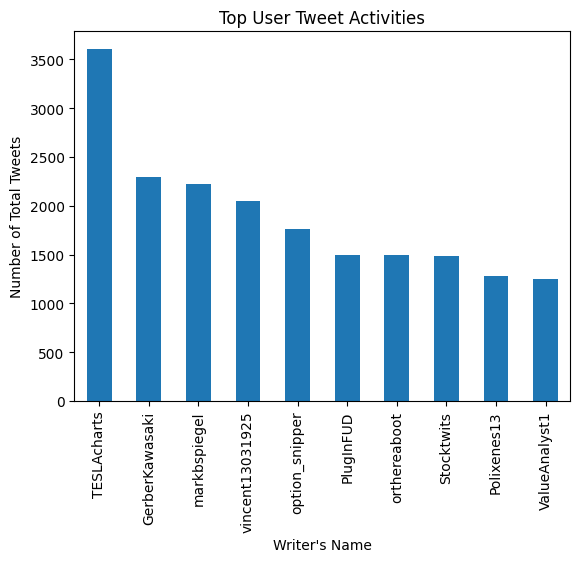

In [37]:

counts = filterTweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("Writer's Name")
plt.show()

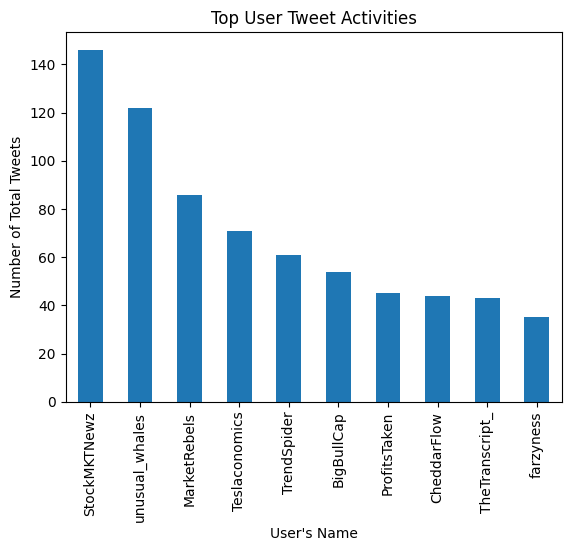

In [38]:
counts = crawled_tweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("User's Name")
plt.show()

Graph above shows active users/writers

<AxesSubplot: ylabel='ticker_symbol'>

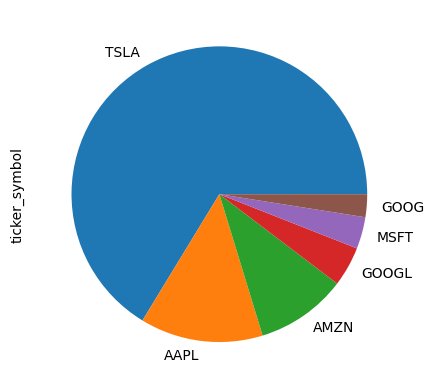

In [39]:
counts = filterTweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

<AxesSubplot: ylabel='ticker_symbol'>

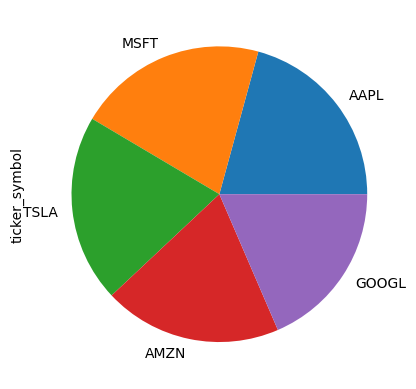

In [40]:
counts = crawled_tweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

Notice that there are more TSLA tweets in the dataset.

### Active Tweets dates

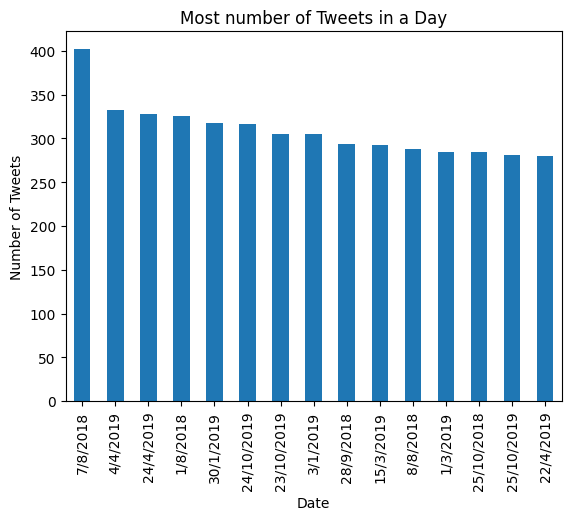

In [41]:
count = filterTweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

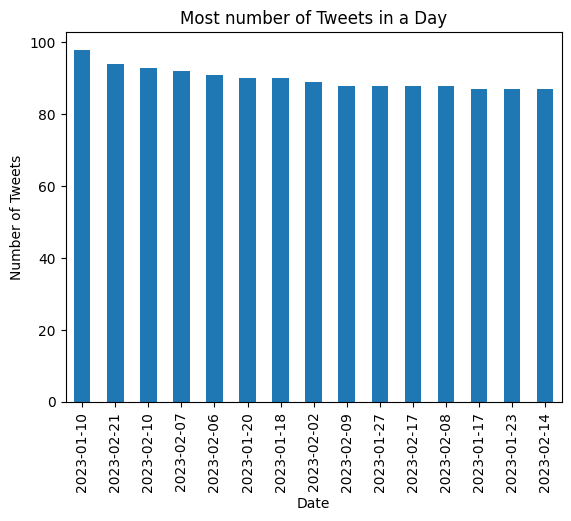

In [42]:
count = crawled_tweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

Above bar graphs shows the highest tweets in the respective days

### Word Cloud of Tweets

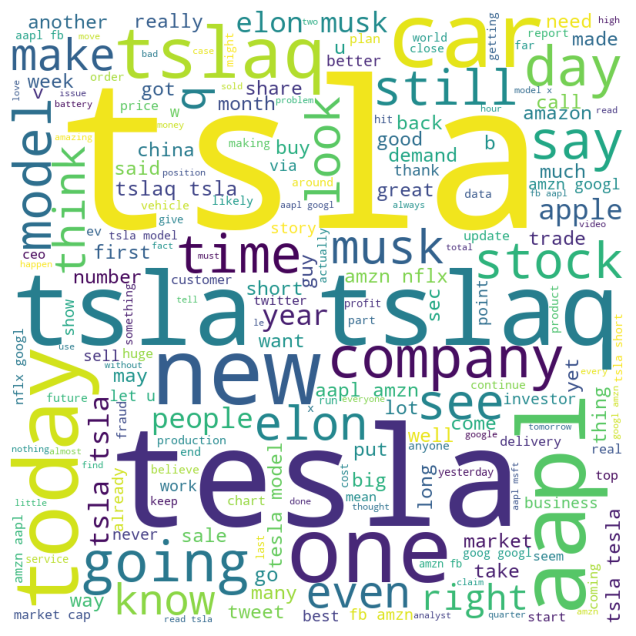

In [43]:
text = " ".join(filterTweets["clean_text"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

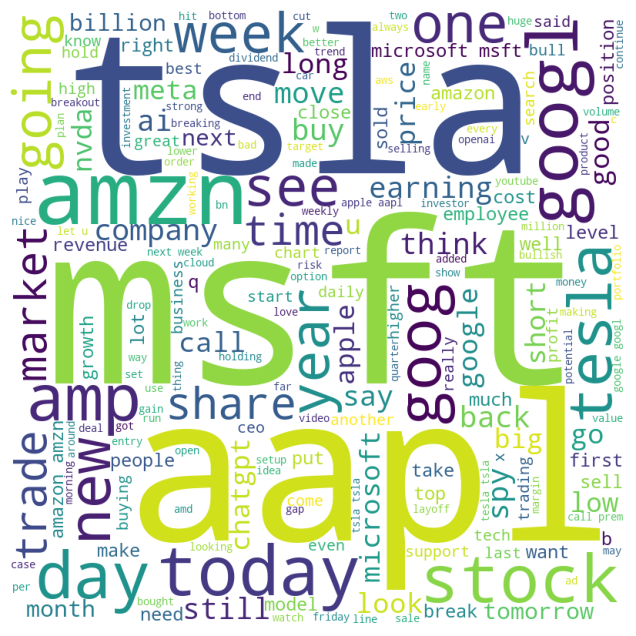

In [44]:
text = " ".join(crawled_tweets["clean_text"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud we can tell that tsla aapl msft are common tweets in Twitter

In [45]:
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category,clean_text
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0,would like point right right moment going face...
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0,tesla save month gas ten year take saving put ...
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1,tesla feature request threadfeel free reply co...
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1,sell book versus sell whatever fuck want amzn
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0,think basically financially insane buy anythin...


### Convert Positive, Negative and Neutral to numeral labels and Subjectivity

### Splitting up data for Prediction using ensemble machine learning models For Blob Subjectivity and Polarity Analysis

In [46]:
X = filterTweets["clean_text"].values 
y = filterTweets[["sentiment_category"]].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [47]:
X_subj = filterTweets["clean_text"].values 
y_subj = filterTweets["subjectivity_category"].values
X_train_subj, X_test_subj, y_train_subj, y_test_subj = train_test_split(
    X_subj, y_subj, test_size=0.20, random_state=42)

In [48]:
filterTweets["subjectivity_category"].value_counts()

0    60261
1    27784
Name: subjectivity_category, dtype: int64

### Evaluation Data -> Crawled and labelled data

In [49]:
#Evluation Data for Subjectivity
eval_data_x = crawled_tweets['clean_text'].values
eval_data_y = crawled_tweets['vote_subjectivity'].values


In [50]:
def metric_report(y_test,y_pred,time,no_record_x_test,y_eval, y_pred_eval,time_eval,no_record_x_eval):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)

    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")
    

    accuracy_eval = accuracy_score(y_eval,y_pred_eval)
    fmeasure_eval = f1_score(y_eval,y_pred_eval, average = "weighted", zero_division = 1)
    recall_eval = recall_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    precision_eval = precision_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    print(f"Model Metrics with evaluation data")
    print(f"The accuracy of the Model is {accuracy_eval}")
    print(f"The F-Score of the Model is {fmeasure_eval}")
    print(f"The Recall of the Model is {recall_eval}")
    print(f"The precision of the Model is {precision_eval}")
    print(f"The time taken for the Model prediction is {time_eval} seconds")
    print(f"The number of records per second is {no_record_x_eval//time_eval}")

In [51]:
def metric_report_noeval(y_test,y_pred,time,no_record_x_test):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)

    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")

### Vectorise and TFIDF train and test datas

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [53]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been lemmatised

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)


# For Subjectivity Blob Analysis Vectorised
X_train_subj_vec = vectoriser.fit_transform(X_train_subj)
X_test_subj_vec = vectoriser.transform(X_test_subj)
eval_data_x_subj_vec = vectoriser.transform(eval_data_x)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been lemmatised


X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)

# For Subjectivity Blob Analysis TFIDF
X_train_subj_tfidf = vectoriser_tfidf.fit_transform(X_train_subj)
X_test_subj_tfidf = vectoriser_tfidf.transform(X_test_subj)
eval_data_x_subj_tfidf = vectoriser_tfidf.transform(eval_data_x)




## Doing up Machine Learning Models for TextBlob Analysis

## Subjectivity Prediction

In [54]:
def lr_clf(X_train, y_train, X_test, y_test,x_eval,y_eval):
    # Train the model using Naive Bayes algorithm
    clf = LogisticRegression(max_iter = 1000)
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    
    metric_report(y_test,y_pred,time_taken,test_size, y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [73]:
# logistic regression (subjectivity) for lemmatised Dataset and vectorised
lr_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.9047078198648418
The F-Score of the Model is 0.9034375953635296
The Recall of the Model is 0.9047078198648418
The precision of the Model is 0.9038743147482508
The time taken for the Model prediction is 0.001996278762817383 seconds
The number of records per second is 8820912.0
Model Metrics with evaluation data
The accuracy of the Model is 0.854118194509074
The F-Score of the Model is 0.857470908922298
The Recall of the Model is 0.854118194509074
The precision of the Model is 0.8624725133830456
The time taken for the Model prediction is 0.0009958744049072266 seconds
The number of records per second is 4315805.0


In [74]:
# logistic regression (subjectivity) for lemmatised Dataset and tfidf
lr_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8774490317451303
The F-Score of the Model is 0.8728756649347582
The Recall of the Model is 0.8774490317451303
The precision of the Model is 0.8787838729922951
The time taken for the Model prediction is 0.001994609832763672 seconds
The number of records per second is 8828292.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8666821777570963
The F-Score of the Model is 0.865516811457318
The Recall of the Model is 0.8666821777570963
The precision of the Model is 0.8645575239517107
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [55]:
def multi_nb_clf(X_train, y_train, X_test, y_test,x_eval, y_eval):
    # Train the model using Naive Bayes algorithm
    clf = MultinomialNB()
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,test_size,y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [76]:
# Naive Bayes for Lemmatised Dataset and Vectorised
multi_nb_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8137316145153046
The F-Score of the Model is 0.8115402929606511
The Recall of the Model is 0.8137316145153046
The precision of the Model is 0.8105051206660747
The time taken for the Model prediction is 0.0029625892639160156 seconds
The number of records per second is 5943787.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8168915774778966
The F-Score of the Model is 0.806422650523489
The Recall of the Model is 0.8168915774778966
The precision of the Model is 0.8019879543092312
The time taken for the Model prediction is 0.0010342597961425781 seconds
The number of records per second is 4155628.0


In [77]:
# Naive Bayes for lemmatised crawled dataset and TFIDF
multi_nb_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7320688284400023
The F-Score of the Model is 0.6588030897567232
The Recall of the Model is 0.7320688284400023
The precision of the Model is 0.7914915022495823
The time taken for the Model prediction is 0.0019943714141845703 seconds
The number of records per second is 8829348.0
Model Metrics with evaluation data
The accuracy of the Model is 0.80316426244765
The F-Score of the Model is 0.7348281540004485
The Recall of the Model is 0.80316426244765
The precision of the Model is 0.7912175200980945
The time taken for the Model prediction is 0.0019979476928710938 seconds
The number of records per second is 2151207.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [56]:
def dt_clf(X_train, y_train, X_test,y_test,x_eval, y_eval):
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [79]:
# Decision Tree Classifier (subjectivity) for Lemmatised Dataset and vectorised
dt_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8445113294338122
The F-Score of the Model is 0.8451831112691248
The Recall of the Model is 0.8445113294338122
The precision of the Model is 0.8460576885371314
The time taken for the Model prediction is 0.02495408058166504 seconds
The number of records per second is 705656.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8071195905072126
The F-Score of the Model is 0.8183843371350904
The Recall of the Model is 0.8071195905072126
The precision of the Model is 0.8428294045395431
The time taken for the Model prediction is 0.00498652458190918 seconds
The number of records per second is 861922.0


In [80]:
# Decision Tree Classifier (subjectivity) for Lemmatised Dataset and tfidf
dt_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8276449542847407
The F-Score of the Model is 0.8281358786541038
The Recall of the Model is 0.8276449542847407
The precision of the Model is 0.8287106314157957
The time taken for the Model prediction is 0.021456003189086914 seconds
The number of records per second is 820702.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7899022801302932
The F-Score of the Model is 0.8018067209620189
The Recall of the Model is 0.7899022801302932
The precision of the Model is 0.8253661628003751
The time taken for the Model prediction is 0.0069811344146728516 seconds
The number of records per second is 615659.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [57]:
def rf_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))


In [82]:
# Random Forest Classifier (subjectivity) for Lemmatised Dataset and vectorised
rf_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8694417627349651
The F-Score of the Model is 0.8682843750128044
The Recall of the Model is 0.8694417627349651
The precision of the Model is 0.8678744557781424
The time taken for the Model prediction is 2.436012029647827 seconds
The number of records per second is 7228.0
Model Metrics with evaluation data
The accuracy of the Model is 0.857375523499302
The F-Score of the Model is 0.8611265137142639
The Recall of the Model is 0.857375523499302
The precision of the Model is 0.8671056864801233
The time taken for the Model prediction is 0.5715727806091309 seconds
The number of records per second is 7519.0


In [83]:
# Random Forest Classifier (subjectivity) for Lemmatised Dataset and tfidf
rf_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8622863308535408
The F-Score of the Model is 0.8584458274392391
The Recall of the Model is 0.8622863308535408
The precision of the Model is 0.8607079196719395
The time taken for the Model prediction is 2.1777851581573486 seconds
The number of records per second is 8085.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8517915309446255
The F-Score of the Model is 0.8500335647536256
The Recall of the Model is 0.8517915309446255
The precision of the Model is 0.8486331569957382
The time taken for the Model prediction is 0.5516271591186523 seconds
The number of records per second is 7791.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [58]:
def ensemble_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf1 = DecisionTreeClassifier()
    clf2 = RandomForestClassifier()
    clf3 = SVC()

    # Create the ensemble classifier
    ensemble = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
    
    # Train the ensemble classifier
    ensemble.fit(X_train,y_train)
    start_time = time.time()
    # Make predictions on the test set
    y_pred = ensemble.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = ensemble.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [85]:
# Ensemble Classifier (subjectivity) for Lemmatised Dataset and vectorised
ensemble_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8807995911181782
The F-Score of the Model is 0.8797165257872659
The Recall of the Model is 0.8807995911181782
The precision of the Model is 0.8794314894738235
The time taken for the Model prediction is 114.02066135406494 seconds
The number of records per second is 154.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8594695207073058
The F-Score of the Model is 0.8634153156542828
The Recall of the Model is 0.8594695207073058
The precision of the Model is 0.8699467681782376
The time taken for the Model prediction is 27.208937644958496 seconds
The number of records per second is 157.0


In [86]:
# Ensemble Classifier (subjectivity) for Lemmatised Dataset and tfidf
ensemble_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8827872110852405
The F-Score of the Model is 0.8804754618337615
The Recall of the Model is 0.8827872110852405
The precision of the Model is 0.8815556372255202
The time taken for the Model prediction is 121.3268039226532 seconds
The number of records per second is 145.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8592368543508608
The F-Score of the Model is 0.8612347986651212
The Recall of the Model is 0.8592368543508608
The precision of the Model is 0.8638348160839959
The time taken for the Model prediction is 28.89489436149597 seconds
The number of records per second is 148.0


### Support Vector Machine Model

In [59]:
def svm_clf(X_train,y_train,X_test, y_test, x_eval , y_eval):
    
    clf = SVC(kernel = "rbf", random_state = 1)
    clf.fit(X_train,y_train)
    start_time = time.time()
    svm_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    svm_pred = (svm_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,svm_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [88]:
# SVM Classifier (subjectivity) for Lemmatised Dataset and vectorised

svm_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.885797035606792
The F-Score of the Model is 0.8826200711642483
The Recall of the Model is 0.885797035606792
The precision of the Model is 0.8857800325717694
The time taken for the Model prediction is 111.26799130439758 seconds
The number of records per second is 158.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8720335039553281
The F-Score of the Model is 0.8723470808702973
The Recall of the Model is 0.8720335039553281
The precision of the Model is 0.872678037077999
The time taken for the Model prediction is 26.587209463119507 seconds
The number of records per second is 161.0


In [89]:
# SVM Classifier (subjectivity) for Lemmatised Dataset and tfidf
svm_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8949968765971946
The F-Score of the Model is 0.8921047757645585
The Recall of the Model is 0.8949968765971946
The precision of the Model is 0.8955383967353182
The time taken for the Model prediction is 121.4455018043518 seconds
The number of records per second is 144.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8673801768264309
The F-Score of the Model is 0.8674347803912316
The Recall of the Model is 0.8673801768264309
The precision of the Model is 0.8674898632493573
The time taken for the Model prediction is 28.10552144050598 seconds
The number of records per second is 152.0


### Neural Network Model



In [60]:
def mlp_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "adam", alpha = 1e-5, 
                    hidden_layer_sizes =(32,2), activation = 'logistic', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [61]:
# Multilayer Perceptron for Lemmatised Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

In [ ]:
# Multilayer Perceptron for Lemmatised Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.6837412686694304
The F-Score of the Model is 0.5553134928516943
The Recall of the Model is 0.6837412686694304
The precision of the Model is 0.7837608538122518
The time taken for the Model prediction is 0.017499446868896484 seconds
The number of records per second is 1006260.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7919962773382969
The F-Score of the Model is 0.7000663017552746
The Recall of the Model is 0.7919962773382969
The precision of the Model is 0.8352618259794237
The time taken for the Model prediction is 0.004984378814697266 seconds
The number of records per second is 862294.0


### TensorFlow Subjectivity Machine Modeling

In [95]:
# TensorFlow for Lemmatised Dataset (subjectivity) and Vec
# Define the model architecture
model_vec2_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj = model_vec2_subj.fit(X_train_subj_vec, y_train_subj, epochs=7, batch_size=16, validation_data=(X_test_subj_vec, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_subj.load_weights("model_polarity_subj_vec2.h5")
test_loss, test_acc = model_vec2_subj.evaluate(X_test_subj_vec, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2_subj.predict(X_test_subj_vec)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec2_subj.predict(eval_data_x_subj_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y))

Epoch 1/7
4403/4403 [==============================] - 143s 32ms/step - loss: 0.5178 - accuracy: 0.8232 - val_loss: 0.4362 - val_accuracy: 0.8811
Epoch 2/7
4403/4403 [==============================] - 145s 33ms/step - loss: 0.4520 - accuracy: 0.8801 - val_loss: 0.4248 - val_accuracy: 0.8939
Epoch 3/7
4403/4403 [==============================] - 144s 33ms/step - loss: 0.4349 - accuracy: 0.8893 - val_loss: 0.4204 - val_accuracy: 0.8985
Epoch 4/7
4403/4403 [==============================] - 154s 35ms/step - loss: 0.4253 - accuracy: 0.8935 - val_loss: 0.4244 - val_accuracy: 0.8951
Epoch 5/7
4403/4403 [==============================] - 159s 36ms/step - loss: 0.4240 - accuracy: 0.8925 - val_loss: 0.4145 - val_accuracy: 0.8986
Epoch 6/7
4403/4403 [==============================] - 147s 33ms/step - loss: 0.4170 - accuracy: 0.8951 - val_loss: 0.4121 - val_accuracy: 0.8989
Epoch 7/7
551/551 [==============================] - 3s 5ms/step - loss: 0.4121 - accuracy: 0.8989
Test loss: 0.412070602178

In [96]:
# TensorFlow for Lemmatised Dataset (subjectivity) and tfidf
# Define the model architecture
model_tfidf_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf_subj
model_tfidf_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_tfidf.h5", save_best_only=True)

# Train the model_tfidf_subj
history_subj_tfidf = model_tfidf_subj.fit(X_train_subj_tfidf, y_train_subj, epochs=7, batch_size=16, validation_data=(X_test_subj_tfidf, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf_subj on the test set
model_tfidf_subj.load_weights("model_subj_tfidf.h5")
test_loss, test_acc = model_tfidf_subj.evaluate(X_test_subj_tfidf, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()

y_pred = model_tfidf_subj.predict(X_test_subj_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_tfidf_subj.predict(eval_data_x_subj_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval,time_taken_eval, len(eval_data_y))

Epoch 1/7
4403/4403 [==============================] - 163s 37ms/step - loss: 0.5345 - accuracy: 0.7988 - val_loss: 0.4424 - val_accuracy: 0.8734
Epoch 2/7
4403/4403 [==============================] - 161s 36ms/step - loss: 0.4636 - accuracy: 0.8670 - val_loss: 0.4220 - val_accuracy: 0.8891
Epoch 3/7
4403/4403 [==============================] - 183s 41ms/step - loss: 0.4463 - accuracy: 0.8770 - val_loss: 0.4166 - val_accuracy: 0.8927
Epoch 4/7
4403/4403 [==============================] - 176s 40ms/step - loss: 0.4472 - accuracy: 0.8782 - val_loss: 0.4158 - val_accuracy: 0.8953
Epoch 5/7
4403/4403 [==============================] - 153s 35ms/step - loss: 0.4405 - accuracy: 0.8790 - val_loss: 0.4238 - val_accuracy: 0.8916
Epoch 6/7
4403/4403 [==============================] - 148s 34ms/step - loss: 0.4433 - accuracy: 0.8805 - val_loss: 0.4179 - val_accuracy: 0.8950
Epoch 7/7
551/551 [==============================] - 3s 5ms/step - loss: 0.4151 - accuracy: 0.8968
Test loss: 0.415141105651

In [97]:
# LSTM for Lemmatised Dataset (subjectivity) 
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj)
test_sequence = tokenizer.texts_to_sequences(X_test_subj)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_subj_vec
model_subj_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_vec.h5", save_best_only=True)

# Train the model_subj_vec
history_subj_vec = model_subj_vec.fit(pad_train, y_train_subj, epochs=7, batch_size=16, validation_data=(pad_test, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_vec on the test set
model_subj_vec.load_weights("model_subj_vec.h5")
test_loss, test_acc = model_subj_vec.evaluate(pad_test, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj,y_pred,time_taken,len(y_test_subj),eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y) )

Epoch 1/7
4403/4403 [==============================] - 369s 83ms/step - loss: 0.3396 - accuracy: 0.8633 - val_loss: 0.2382 - val_accuracy: 0.9144
Epoch 2/7
4403/4403 [==============================] - 314s 71ms/step - loss: 0.1975 - accuracy: 0.9330 - val_loss: 0.2516 - val_accuracy: 0.9080
Epoch 3/7
4403/4403 [==============================] - 311s 71ms/step - loss: 0.1272 - accuracy: 0.9589 - val_loss: 0.3090 - val_accuracy: 0.9022
Epoch 4/7
4403/4403 [==============================] - 302s 69ms/step - loss: 0.0819 - accuracy: 0.9729 - val_loss: 0.4052 - val_accuracy: 0.8959
Epoch 5/7
4403/4403 [==============================] - 288s 65ms/step - loss: 0.0548 - accuracy: 0.9813 - val_loss: 0.5304 - val_accuracy: 0.8895
Epoch 6/7
4403/4403 [==============================] - 334s 76ms/step - loss: 0.0402 - accuracy: 0.9859 - val_loss: 0.5958 - val_accuracy: 0.8791
Epoch 7/7
551/551 [==============================] - 6s 11ms/step - loss: 0.2382 - accuracy: 0.9144
Test loss: 0.23823431134

### Polarity Machine Learning Model

### Logistic Regression Model

In [61]:
filterSubjTweets = filterTweets.copy()
filterSubjTweets = filterSubjTweets.loc[filterSubjTweets['subjectivity_category'] == 1]



In [62]:
filterSubjTweets = filterSubjTweets.loc[filterSubjTweets['sentiment_category'] != 0]


In [63]:
sentiment_map_self = {-1 : 0}

In [64]:
filterSubjTweets["sentiment_category"].replace(sentiment_map_self, inplace = True)


In [65]:
filterSubjTweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category,clean_text
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1,tesla feature request threadfeel free reply co...
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,0,1,sell book versus sell whatever fuck want amzn
11,4276279,1.190000e+18,TSLA,jack,24/10/2019,Now anyone can buy $42 or even $1 worth of Ber...,298,589,0,887,1,1,anyone buy even worth berkshire hathaway brka ...
12,4076527,1.110000e+18,TSLA,ElectricTempus,17/3/2019,"People are buying Tesla’s, in their Tesla’s. ...",292,0,0,292,1,1,people buying tesla tesla many reason love com...
13,3750143,1.000000e+18,TSLA,MattLevinson,25/5/2018,Thank you @elonmusk and @tesla for by FAR the ...,290,840,0,1130,1,1,thank far best consumer product ever used day ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81079,4179793,1.140000e+18,TSLA,Polixenes13,11/6/2019,$TSLA's Nevada Gigafactory is a fine place for...,0,7,33,40,0,1,tslas nevada gigafactory fine place making cyl...
81080,4180250,1.140000e+18,TSLA,PlugInFUD,11/6/2019,"""this is quite a hard problem. ignore that we ...",0,4,26,30,1,1,quite hard problem ignore completely fabricate...
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,0,1,fraudulent slip musk convince investor oops me...
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,1,1,low beloved tsla need go get old high


In [66]:
X = filterSubjTweets["clean_text"].values 
y = filterSubjTweets["sentiment_category"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [67]:

crawled_tweets = crawled_tweets.loc[crawled_tweets['vote_sentiment'] != 0]


In [68]:
crawled_tweets["vote_sentiment"].replace(sentiment_map_self, inplace = True)


C:\Users\eric2\AppData\Local\Temp\ipykernel_34892\1617474268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crawled_tweets["vote_sentiment"].replace(sentiment_map_self, inplace = True)


In [69]:
#Evluation Data for Subjectivity
eval_data_x = crawled_tweets['clean_text'].values
eval_data_y_polarity = crawled_tweets['vote_sentiment'].values


In [70]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been lemmatised

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been lemmatised

X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)







In [71]:
# Lemmatised and vectorised dataset
lr_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec,eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8916151468315301
The F-Score of the Model is 0.8900459073649457
The Recall of the Model is 0.8916151468315301
The precision of the Model is 0.8899012711334706
The time taken for the Model prediction is 0.00099945068359375 seconds
The number of records per second is 5178844.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7815686274509804
The F-Score of the Model is 0.7621482133944325
The Recall of the Model is 0.7815686274509804
The precision of the Model is 0.7724581648934361
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


In [72]:
# Lemmatised and tfidf dataset
lr_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8603168469860897
The F-Score of the Model is 0.85126317170833
The Recall of the Model is 0.8603168469860897
The precision of the Model is 0.8624235065829357
The time taken for the Model prediction is 0.0009989738464355469 seconds
The number of records per second is 5181316.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7607843137254902
The F-Score of the Model is 0.7110640347435616
The Recall of the Model is 0.7607843137254902
The precision of the Model is 0.7742245277418108
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 254999999.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [73]:
# Naive Bayes Classification for Lemmatised and Vectorised Dataset
multi_nb_clf(X_train_vec, y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8369397217928902
The F-Score of the Model is 0.8293902767329707
The Recall of the Model is 0.8369397217928902
The precision of the Model is 0.8324779580696456
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 5189987.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7266666666666667
The F-Score of the Model is 0.657490734590881
The Recall of the Model is 0.7266666666666667
The precision of the Model is 0.712847999847472
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 2556279.0


In [74]:
# Naive Bayes Classification for Lemmatised and tfidf Dataset
multi_nb_clf(X_train_tfidf, y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7308732612055642
The F-Score of the Model is 0.6357487196349746
The Recall of the Model is 0.7308732612055642
The precision of the Model is 0.7916811739867258
The time taken for the Model prediction is 0.0009963512420654297 seconds
The number of records per second is 5194955.0
Model Metrics with evaluation data
The accuracy of the Model is 0.707843137254902
The F-Score of the Model is 0.5895290686591853
The Recall of the Model is 0.707843137254902
The precision of the Model is 0.7934337242565135
The time taken for the Model prediction is 0.0009965896606445312 seconds
The number of records per second is 2558726.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [75]:
# Lemmatisedand vectorised dataset
dt_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8469860896445132
The F-Score of the Model is 0.8473765285077496
The Recall of the Model is 0.8469860896445132
The precision of the Model is 0.8478146018794065
The time taken for the Model prediction is 0.005984783172607422 seconds
The number of records per second is 864860.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7407843137254903
The F-Score of the Model is 0.7119121004354904
The Recall of the Model is 0.7407843137254903
The precision of the Model is 0.7199785856791764
The time taken for the Model prediction is 0.0029938220977783203 seconds
The number of records per second is 851754.0


In [76]:
# Lemmatised and tfidf dataset
dt_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8367465224111282
The F-Score of the Model is 0.838114357374581
The Recall of the Model is 0.8367465224111282
The precision of the Model is 0.8400213101467017
The time taken for the Model prediction is 0.005983829498291016 seconds
The number of records per second is 864997.0
Model Metrics with evaluation data
The accuracy of the Model is 0.744313725490196
The F-Score of the Model is 0.7225075404471545
The Recall of the Model is 0.744313725490196
The precision of the Model is 0.7252363843946968
The time taken for the Model prediction is 0.002992868423461914 seconds
The number of records per second is 852025.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [77]:
# Lemmatised and vectorised dataset
rf_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8769319938176198
The F-Score of the Model is 0.8737005092836001
The Recall of the Model is 0.8769319938176198
The precision of the Model is 0.874662252725196
The time taken for the Model prediction is 0.4219799041748047 seconds
The number of records per second is 12265.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7537254901960785
The F-Score of the Model is 0.70584110644594
The Recall of the Model is 0.7537254901960785
The precision of the Model is 0.7542719187163529
The time taken for the Model prediction is 0.22147703170776367 seconds
The number of records per second is 11513.0


In [78]:
# Lemmatised and tfidf dataset
rf_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8719088098918083
The F-Score of the Model is 0.8663545745086527
The Recall of the Model is 0.8719088098918083
The precision of the Model is 0.8710464135110338
The time taken for the Model prediction is 0.463350772857666 seconds
The number of records per second is 11170.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7450980392156863
The F-Score of the Model is 0.6877879319134121
The Recall of the Model is 0.7450980392156863
The precision of the Model is 0.7480370936253289
The time taken for the Model prediction is 0.2853105068206787 seconds
The number of records per second is 8937.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [79]:
# Lemmatised and vectorised dataset
ensemble_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8825347758887172
The F-Score of the Model is 0.8792779448504594
The Recall of the Model is 0.8825347758887172
The precision of the Model is 0.8807037941232356
The time taken for the Model prediction is 10.47299838066101 seconds
The number of records per second is 494.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7596078431372549
The F-Score of the Model is 0.7133374665820038
The Recall of the Model is 0.7596078431372549
The precision of the Model is 0.7649012368504885
The time taken for the Model prediction is 5.354412317276001 seconds
The number of records per second is 476.0


In [80]:
# Lemmatised and tfidf dataset
ensemble_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8777047913446677
The F-Score of the Model is 0.8731323706404146
The Recall of the Model is 0.8777047913446677
The precision of the Model is 0.8765224944882246
The time taken for the Model prediction is 10.84791374206543 seconds
The number of records per second is 477.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7541176470588236
The F-Score of the Model is 0.7045155891159005
The Recall of the Model is 0.7541176470588236
The precision of the Model is 0.7578123039564331
The time taken for the Model prediction is 5.53384804725647 seconds
The number of records per second is 460.0


### Support Vector Machine Model

In [81]:
# Lemmatised and vectorised dataset
svm_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8699768160741885
The F-Score of the Model is 0.8631035014251348
The Recall of the Model is 0.8699768160741885
The precision of the Model is 0.8707058212047692
The time taken for the Model prediction is 9.878983736038208 seconds
The number of records per second is 523.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7549019607843137
The F-Score of the Model is 0.7027701082487235
The Recall of the Model is 0.7549019607843137
The precision of the Model is 0.7642038762619235
The time taken for the Model prediction is 4.874683141708374 seconds
The number of records per second is 523.0


In [82]:
# Lemmatised and tfidf dataset
svm_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.874613601236476
The F-Score of the Model is 0.86827084864194
The Recall of the Model is 0.874613601236476
The precision of the Model is 0.8754627054698726
The time taken for the Model prediction is 10.733429670333862 seconds
The number of records per second is 482.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7607843137254902
The F-Score of the Model is 0.7120429919540632
The Recall of the Model is 0.7607843137254902
The precision of the Model is 0.7722074223406212
The time taken for the Model prediction is 7.073307037353516 seconds
The number of records per second is 360.0


### Neural Network Model



In [83]:
def mlp_clf_pol(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "adam", alpha = 1e-5, 
                    hidden_layer_sizes =(64,2), activation = 'tanh',  max_iter = 1000, early_stopping = True)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    start_time_eval = time.time()
    nn_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    nn_pred_eval = (nn_pred_eval >= 0.5).astype(int)
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval, nn_pred_eval, time_taken_eval, len(y_eval))

In [84]:
# Lemmatised and vectorised dataset
mlp_clf_pol(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.875
The F-Score of the Model is 0.8745531282227293
The Recall of the Model is 0.875
The precision of the Model is 0.8741987179487181
The time taken for the Model prediction is 0.007979154586791992 seconds
The number of records per second is 648690.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7756862745098039
The F-Score of the Model is 0.766588655532593
The Recall of the Model is 0.7756862745098039
The precision of the Model is 0.7652972189865369
The time taken for the Model prediction is 0.004988431930541992 seconds
The number of records per second is 511182.0


In [85]:
# Lemmatisedand tfidf dataset
mlp_clf_pol(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8688176197836167
The F-Score of the Model is 0.8666359960835285
The Recall of the Model is 0.8688176197836167
The precision of the Model is 0.8662261926932441
The time taken for the Model prediction is 0.007979869842529297 seconds
The number of records per second is 648632.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7760784313725491
The F-Score of the Model is 0.7625199222052038
The Recall of the Model is 0.7760784313725491
The precision of the Model is 0.7644232328129703
The time taken for the Model prediction is 0.00498652458190918 seconds
The number of records per second is 511378.0


#### TensorFlow 

In [86]:
loss = "binary_crossentropy"

In [87]:
# Lemmatised Tensorflow Model for sentiment vectorised
# Define the model architecture
model_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2 = model_vec2.fit(X_train_vec, y_train, epochs=15, batch_size=16, validation_data=(X_test_vec, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2.load_weights("model_polarity_vec2.h5")
test_loss, test_acc = model_vec2.evaluate(X_test_vec, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2.predict(X_test_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_vec2.predict(eval_data_x_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)

metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval, len(eval_data_y_polarity))

Epoch 1/15
1294/1294 [==============================] - 48s 36ms/step - loss: 0.5384 - accuracy: 0.8077 - val_loss: 0.4375 - val_accuracy: 0.8738
Epoch 2/15
1294/1294 [==============================] - 45s 35ms/step - loss: 0.3978 - accuracy: 0.9036 - val_loss: 0.4249 - val_accuracy: 0.8860
Epoch 3/15
1294/1294 [==============================] - 47s 36ms/step - loss: 0.3329 - accuracy: 0.9306 - val_loss: 0.4261 - val_accuracy: 0.8862
Epoch 4/15
1294/1294 [==============================] - 45s 35ms/step - loss: 0.2980 - accuracy: 0.9449 - val_loss: 0.4465 - val_accuracy: 0.8850
Epoch 5/15
1294/1294 [==============================] - 43s 33ms/step - loss: 0.2856 - accuracy: 0.9491 - val_loss: 0.4590 - val_accuracy: 0.8903
Epoch 6/15
1294/1294 [==============================] - 45s 34ms/step - loss: 0.2750 - accuracy: 0.9560 - val_loss: 0.4540 - val_accuracy: 0.8860
Epoch 7/15
162/162 [==============================] - 1s 7ms/step - loss: 0.4249 - accuracy: 0.8860
Test loss: 0.42490151524

In [88]:
# Tensorflow for lemmatised data with tfidf
# Define the model architecture
model_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_tfidf.h5", save_best_only=True)

# Train the model_tfidf
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train, epochs=15, batch_size=16, validation_data=(X_test_tfidf, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_tfidf.load_weights("model_polarity_tfidf.h5")
test_loss, test_acc = model_tfidf.evaluate(X_test_tfidf, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_tfidf.predict(X_test_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_tfidf.predict(eval_data_x_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval,len(eval_data_y_polarity))

Epoch 1/15
1294/1294 [==============================] - 48s 36ms/step - loss: 0.5168 - accuracy: 0.8074 - val_loss: 0.4369 - val_accuracy: 0.8646
Epoch 2/15
1294/1294 [==============================] - 45s 35ms/step - loss: 0.3781 - accuracy: 0.9051 - val_loss: 0.4243 - val_accuracy: 0.8798
Epoch 3/15
1294/1294 [==============================] - 44s 34ms/step - loss: 0.3219 - accuracy: 0.9345 - val_loss: 0.4235 - val_accuracy: 0.8881
Epoch 4/15
1294/1294 [==============================] - 44s 34ms/step - loss: 0.2965 - accuracy: 0.9473 - val_loss: 0.4543 - val_accuracy: 0.8847
Epoch 5/15
1294/1294 [==============================] - 49s 38ms/step - loss: 0.2785 - accuracy: 0.9515 - val_loss: 0.4566 - val_accuracy: 0.8821
Epoch 6/15
1294/1294 [==============================] - 56s 43ms/step - loss: 0.2672 - accuracy: 0.9557 - val_loss: 0.4313 - val_accuracy: 0.8841
Epoch 7/15
1294/1294 [==============================] - 45s 35ms/step - loss: 0.2598 - accuracy: 0.9576 - val_loss: 0.5132 -

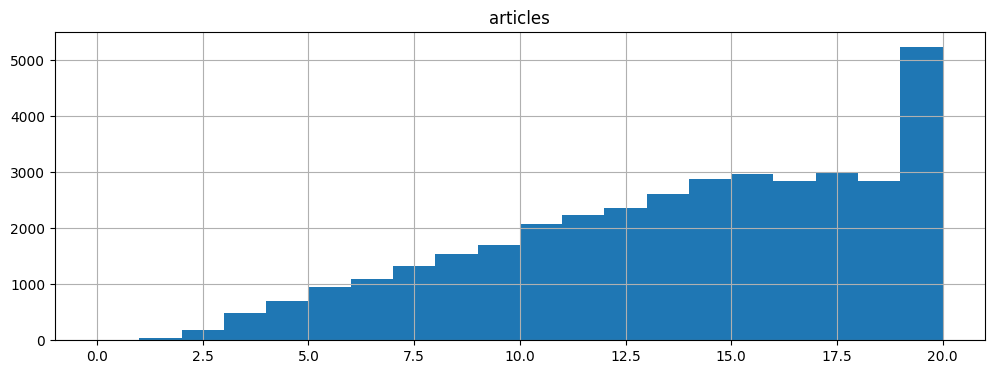

In [89]:
tweet_word_count = [len(sentence.split()) for sentence in filterTweets.body]
tweet_word_count[:10]

# Analyze the distribution of sequences by looking at the length of the texts
pd.DataFrame({'articles': tweet_word_count}).hist(
    bins=20, figsize=(12, 4), range=[0, 20]
)
plt.show()

In [90]:
# LSTM for lemmatised data
tokenizer = Tokenizer(num_words=5500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence, T)

# Define the model architecture
model_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_vec
model_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec.h5", save_best_only=True)

# Train the model_vec
history_subjectivity_tokenizer = model_vec.fit(pad_train, y_train, epochs=15, batch_size=16, validation_data=(pad_test, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec.load_weights("model_polarity_vec.h5")
test_loss, test_acc = model_vec.evaluate(pad_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time_eval = time.time()
y_pred = model_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report( y_test,y_pred,time_taken,len( y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval, len(eval_data_y_polarity))

Epoch 1/15
1294/1294 [==============================] - 63s 46ms/step - loss: 0.3596 - accuracy: 0.8501 - val_loss: 0.2669 - val_accuracy: 0.8916
Epoch 2/15
1294/1294 [==============================] - 51s 40ms/step - loss: 0.1965 - accuracy: 0.9304 - val_loss: 0.2562 - val_accuracy: 0.8955
Epoch 3/15
1294/1294 [==============================] - 56s 43ms/step - loss: 0.1314 - accuracy: 0.9553 - val_loss: 0.2745 - val_accuracy: 0.8963
Epoch 4/15
1294/1294 [==============================] - 59s 46ms/step - loss: 0.0832 - accuracy: 0.9738 - val_loss: 0.3534 - val_accuracy: 0.8912
Epoch 5/15
162/162 [==============================] - 1s 8ms/step - loss: 0.2562 - accuracy: 0.8955
Test loss: 0.2561958134174347
Test accuracy: 0.895479142665863
80/80 [==============================] - 1s 8ms/step
Model Metrics with testing data
The accuracy of the Model is 0.8954791344667697
The F-Score of the Model is 0.8947031446134757
The Recall of the Model is 0.8954791344667697
The precision of the Model 

In [91]:
filterSubjTweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category,clean_text
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1,tesla feature request threadfeel free reply co...
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,0,1,sell book versus sell whatever fuck want amzn
11,4276279,1.190000e+18,TSLA,jack,24/10/2019,Now anyone can buy $42 or even $1 worth of Ber...,298,589,0,887,1,1,anyone buy even worth berkshire hathaway brka ...
12,4076527,1.110000e+18,TSLA,ElectricTempus,17/3/2019,"People are buying Tesla’s, in their Tesla’s. ...",292,0,0,292,1,1,people buying tesla tesla many reason love com...
13,3750143,1.000000e+18,TSLA,MattLevinson,25/5/2018,Thank you @elonmusk and @tesla for by FAR the ...,290,840,0,1130,1,1,thank far best consumer product ever used day ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81079,4179793,1.140000e+18,TSLA,Polixenes13,11/6/2019,$TSLA's Nevada Gigafactory is a fine place for...,0,7,33,40,0,1,tslas nevada gigafactory fine place making cyl...
81080,4180250,1.140000e+18,TSLA,PlugInFUD,11/6/2019,"""this is quite a hard problem. ignore that we ...",0,4,26,30,1,1,quite hard problem ignore completely fabricate...
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,0,1,fraudulent slip musk convince investor oops me...
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,1,1,low beloved tsla need go get old high


# Enhanced Classification for Sarcasm Detection Model

Importing a Kaggle Sarcasm Headlines dataset to train our model to detect sarcasm in tweets

In [92]:
sarcasm_df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [93]:
sarcasm_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [94]:
datasetInfo(sarcasm_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
is_sarcastic     int64
headline        object
article_link    object
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(28619, 3)
--------------------------------------------------------

 Column Names: 
Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')
--------------------------------------------------------

 Null Values: 
is_sarcastic    0.0
headline        0.0
article_link    0.0
dtype: float64
--------------------------------------------------------

 

In [95]:
sarcasm_df["is_sarcastic"].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

### Clean the Sarcasm Dataframe text

In [96]:
clean_dataframe_text(sarcasm_df,"headline",False)

,is_sarcastic,headline,article_link
0,1,thirtysometh scientist unveil doomsday clock h...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep total nail congress fall short gender ...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat veggi delici differ recip,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar get work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretti close use word stream corre...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jew celebr rosh hashasha someth,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,intern affair investig disappoint conspiraci n...,https://local.theonion.com/internal-affairs-in...
28616,0,beauti accept speech week came queer korean,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mar probe destroy orbit spielbergg space palac,https://www.theonion.com/mars-probe-destroyed-...


In [97]:
X_sarcasm = sarcasm_df["headline"].values 
y_sarcasm = sarcasm_df["is_sarcastic"].values
X_train_sarcasm, X_test_sarcasm, y_train_sarcasm, y_test_sarcasm = train_test_split(
    X_sarcasm, y_sarcasm, test_size=0.20, random_state=42)

In [98]:
X_train_sarcasm.shape

(22895,)

In [99]:
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_sarcasm)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_sarcasm)
test_sequence = tokenizer.texts_to_sequences(X_test_sarcasm)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

max_length = max(len(seq) for seq in train_sequences)

# Define the model architecture
model_sarcasm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_sarcasm.summary()
# Compile the model_sarcasm
model_sarcasm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_sarcasm.h5", save_best_only=True)

# Train the model_sarcasm
history_sarcasm = model_sarcasm.fit(pad_train, y_train_sarcasm, epochs=10, batch_size=32, validation_data=(pad_test, y_test_sarcasm), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_sarcasm on the test set
model_sarcasm.load_weights("model_sarcasm.h5")
test_loss, test_acc = model_sarcasm.evaluate(pad_test, y_test_sarcasm)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_sarcasm.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report_noeval(y_test_sarcasm,y_pred,time_taken,len(y_test_sarcasm))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 26, 100)           1771500   
                                                                 
 bidirectional_1 (Bidirectio  (None, 26, 128)          84480     
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [100]:
filterTweetsTemp = filterTweets.copy()

In [101]:
X_train_temp = filterTweetsTemp['body']

In [102]:
print(len(X_train_temp))

88045


In [103]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_temp)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
test_sequence_x = tokenizer.texts_to_sequences(X_train_temp)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train_x = pad_sequences(test_sequence_x)


In [104]:
sarcasm_pred = model_sarcasm.predict(pad_train_x)

2752/2752 [==============================] - 237s 86ms/step


In [105]:
sarcasm_pred = (sarcasm_pred >= 0.5).astype(int)
print(sarcasm_pred)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [106]:
len(sarcasm_pred)

88045

In [107]:
filterTweetsTemp['is_sarcasm'] = sarcasm_pred

In [108]:
filterTweetsTemp

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment_category,subjectivity_category,clean_text,is_sarcasm
0,3786974,1.010000e+18,TSLA,lopezlinette,5/7/2018,"I’d just like to point out that right now, rig...",631,369,0,1000,1,0,would like point right right moment going face...,1
1,4112626,1.120000e+18,TSLA,GerberKawasaki,18/4/2019,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,1,0,tesla save month gas ten year take saving put ...,1
2,4306536,1.200000e+18,TSLA,AlexSibila,26/11/2019,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,1,1,tesla feature request threadfeel free reply co...,1
3,2823018,8.860000e+17,AMZN,internet_dust,14/7/2017,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,-1,1,sell book versus sell whatever fuck want amzn,1
4,4182686,1.140000e+18,TSLA,TeslaNY,13/6/2019,“I think it's basically financially insane to ...,442,0,0,442,-1,0,think basically financially insane buy anythin...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81081,4180147,1.140000e+18,TSLA,Dope007,11/6/2019,Fraudulent slip there Musk. Convince investors...,0,3,31,34,-1,1,fraudulent slip musk convince investor oops me...,1
81082,4176267,1.140000e+18,TSLA,TommyThornton,6/6/2019,From the lows your beloved $TSLA only needs to...,0,0,33,33,1,1,low beloved tsla need go get old high,1
81083,4176276,1.140000e+18,TSLA,PTBarnu88732123,6/6/2019,Only a total dipshit would compare $tsla stock...,0,2,27,29,1,1,total dipshit would compare tsla stock price m...,1
81084,4176239,1.140000e+18,TSLA,EthicsGradient,6/6/2019,$TSLA Very big news for China!,0,9,43,52,0,0,tsla big news china,0


In [113]:
vectoriser_tfidf.vocabulary_

{'see': 21457,
 'elon': 7737,
 'exhausted': 8502,
 'making': 14451,
 'bad': 1833,
 'decision': 6084,
 'due': 7377,
 'done': 7087,
 'amazing': 802,
 'job': 13021,
 'saving': 21113,
 'tesla': 24223,
 'getting': 10203,
 'production': 18809,
 'need': 16015,
 'said': 20981,
 'many': 14544,
 'time': 24677,
 'genius': 10169,
 'einstein': 7659,
 'issue': 12792,
 'tsla': 25343,
 'want': 26924,
 'thank': 24351,
 'great': 10598,
 'early': 7472,
 'call': 3361,
 'googl': 10454,
 'literally': 13985,
 'hit': 11345,
 'lod': 14083,
 'break': 2928,
 'point': 18230,
 'per': 17793,
 'share': 21753,
 'seemed': 21467,
 'normallol': 16369,
 'shout': 21993,
 'bos': 2801,
 'ear': 7467,
 'ground': 10658,
 'lol': 14104,
 'got': 10499,
 'margin': 14568,
 'friday': 9755,
 'would': 27642,
 'anyone': 1115,
 'take': 23938,
 'sidetsla': 22056,
 'tslaq': 25444,
 'story': 23258,
 'simply': 22127,
 'fascinating': 8916,
 'risk': 20623,
 'pretty': 18649,
 'tilted': 24674,
 'downside': 7188,
 'last': 13507,
 'summer': 23578